<a href="https://colab.research.google.com/github/GabrielG1997/COLAB/blob/main/SegmentationByColor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentation by color

This exercise was developed during Bootcamp "BairesDev - Machine Learning Practitioner" provided by [DIO](https://web.dio.me/track/coding-the-future-baires-dev-machine-learning-practitioner)

The code was based on the instructor examples and enhanced using chat GPT, allowing a better undestandment of the content

In [13]:
#Imports
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sys
import subprocess

In [25]:
if "google.colab" in sys.modules:

    subprocess.call("apt-get install subversion".split())
    subprocess.call(
        "wget https://raw.githubusercontent.com/YoniChechik/AI_is_Math/master/c_02a_basic_image_processing/grass.jpg -O grass.jpg",
        shell=True,
    )
    subprocess.call(
        "wget https://raw.githubusercontent.com/YoniChechik/AI_is_Math/master/c_02a_basic_image_processing/hsv_th.png -O hsv_th.png",
        shell=True,
    )

In [10]:
figsize=(10,10)

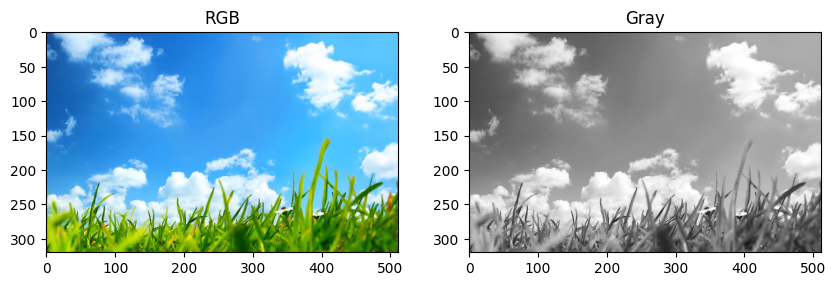

In [32]:
bgr_im = cv2.imread("grass.jpg")
rgb_im = cv2.cvtColor(bgr_im, cv2.COLOR_BGR2RGB)
gray_im = cv2.cvtColor(bgr_im, cv2.COLOR_BGR2GRAY)

fig, axes = plt.subplots(1, 2, figsize=(figsize))  # 1 line, 2 columns
axes[0].imshow(rgb_im)
axes[0].set_title("RGB")
axes[1].imshow(gray_im, cmap="gray")
axes[1].set_title("Gray")
plt.show()



In [33]:
rgb_green = np.uint8([[[0,255,0]]]) #3rd array because cvtColor expected format
hsv_green = cv2.cvtColor(rgb_green, cv2.COLOR_RGB2HSV)[0, 0, :]

rgb_red = np.uint8([[[255,0,0]]])
hsv_red = cv2.cvtColor(rgb_red, cv2.COLOR_RGB2HSV)[0, 0, :]

rgb_blue = np.uint8([[[0,0,255]]])
hsv_blue = cv2.cvtColor(rgb_blue, cv2.COLOR_RGB2HSV)[0, 0, :]
print(f"R: {hsv_red} G: {hsv_green} B: {hsv_blue}")


R: [  0 255 255] G: [ 60 255 255] B: [120 255 255]


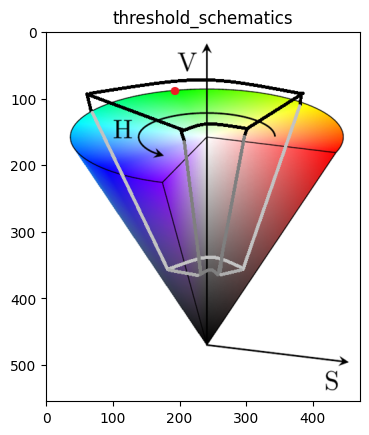

In [30]:
threshold_schematics = cv2.cvtColor(cv2.imread("hsv_th.png"), cv2.COLOR_BGR2RGB )
plt.figsize=(figsize)
plt.imshow(threshold_schematics)
plt.title("threshold_schematics")
plt.show()

Text(0.5, 1.0, 'Blue')

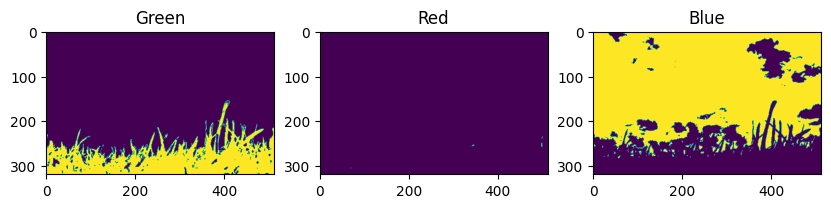

In [39]:
hsv_im = cv2.cvtColor(rgb_im, cv2.COLOR_RGB2HSV)

# Define range of hue and intensity
lower_green = np.array([35, 50, 50])
upper_green = np.array([85, 255, 255])
mask_green = cv2.inRange(hsv_im, lower_green, upper_green)

lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 100, 100])
upper_red2 = np.array([180, 255, 255])
mask_red1 = cv2.inRange(hsv_im, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv_im, lower_red2, upper_red2)
mask_red = mask_red1 | mask_red2


lower_blue = np.array([90, 50, 50])
upper_blue = np.array([130, 255, 255])
mask_blue = cv2.inRange(hsv_im, lower_blue, upper_blue)


fig, axes = plt.subplots(1, 3, figsize=(figsize))
axes[0].imshow(mask_green)
axes[0].set_title("Green")
axes[1].imshow(mask_red)
axes[1].set_title("Red")
axes[2].imshow(mask_blue)
axes[2].set_title("Blue")


Text(0.5, 1.0, 'Blue')

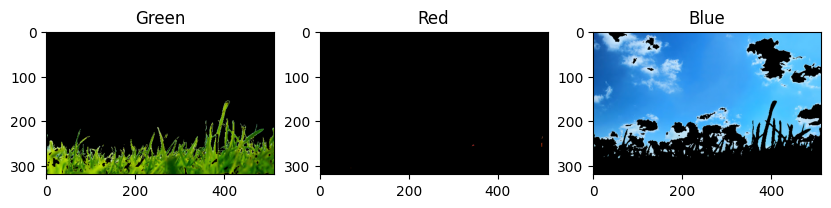

In [40]:
rgb_blue_result = cv2.bitwise_and(rgb_im, rgb_im, mask=mask_blue)
rgb_red_result = cv2.bitwise_and(rgb_im, rgb_im, mask=mask_red)
rgb_green_result = cv2.bitwise_and(rgb_im, rgb_im, mask=mask_green)

fig, axes = plt.subplots(1, 3, figsize=(figsize))
axes[0].imshow(rgb_green_result)
axes[0].set_title("Green")
axes[1].imshow(rgb_red_result)
axes[1].set_title("Red")
axes[2].imshow(rgb_blue_result)
axes[2].set_title("Blue")
